In [112]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [113]:
amzn_data = yfinance.Ticker("AMZN")
amzn_data

yfinance.Ticker object <AMZN>

In [114]:
amzn_df = amzn_data.history(period="max", interval="1d")
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-30 00:00:00-05:00,220.059998,223.000000,218.429993,221.300003,28321200,0.0,0.0
2024-12-31 00:00:00-05:00,222.970001,223.229996,218.940002,219.389999,24819700,0.0,0.0
2025-01-02 00:00:00-05:00,222.029999,225.149994,218.190002,220.220001,33956600,0.0,0.0


In [115]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6956 entries, 1997-05-15 00:00:00-04:00 to 2025-01-06 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6956 non-null   float64
 1   High          6956 non-null   float64
 2   Low           6956 non-null   float64
 3   Close         6956 non-null   float64
 4   Volume        6956 non-null   int64  
 5   Dividends     6956 non-null   float64
 6   Stock Splits  6956 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 434.8 KB


In [116]:
amzn_df.shape

(6956, 7)

In [117]:
amzn_df = amzn_df.loc[:, ['Close', 'Volume']]
amzn_df

,Close,Volume
Date,,
1997-05-15 00:00:00-04:00,0.097917,1443120000
1997-05-16 00:00:00-04:00,0.086458,294000000
1997-05-19 00:00:00-04:00,0.085417,122136000
1997-05-20 00:00:00-04:00,0.081771,109344000
1997-05-21 00:00:00-04:00,0.071354,377064000
...,...,...
2024-12-30 00:00:00-05:00,221.300003,28321200
2024-12-31 00:00:00-05:00,219.389999,24819700
2025-01-02 00:00:00-05:00,220.220001,33956600


In [118]:
# to check for null values
amzn_df.describe()

,Close,Volume
count,6956.000000,6.956000e+03
mean,39.843009,1.365019e+08
std,56.864176,1.377143e+08
min,0.069792,9.744000e+06
25%,2.103125,6.348798e+07
50%,8.960750,1.008700e+08
75%,69.525625,1.557045e+08
max,232.929993,2.086584e+09


SMA Ratio:
- simple trend indicator
- uses a short term and longer term simple moving average
- a ratio value above 1 typically indicates a bullish signal and below 1 indicates a bearish signal
- calculated here using 10 and 50 day windows

In [119]:
amzn_df['SMA 10'] = amzn_df.rolling(window=10)['Close'].mean()
amzn_df['SMA 50'] = amzn_df.rolling(window=50)['Close'].mean()
amzn_df

,Close,Volume,SMA 10,SMA 50
Date,,,,
1997-05-15 00:00:00-04:00,0.097917,1443120000,NaN,NaN
1997-05-16 00:00:00-04:00,0.086458,294000000,NaN,NaN
1997-05-19 00:00:00-04:00,0.085417,122136000,NaN,NaN
1997-05-20 00:00:00-04:00,0.081771,109344000,NaN,NaN
1997-05-21 00:00:00-04:00,0.071354,377064000,NaN,NaN
...,...,...,...,...
2024-12-30 00:00:00-05:00,221.300003,28321200,225.901999,209.2372
2024-12-31 00:00:00-05:00,219.389999,24819700,224.548000,209.8452
2025-01-02 00:00:00-05:00,220.220001,33956600,223.455000,210.4682


In [120]:
amzn_df.dropna(inplace=True)
amzn_df

,Close,Volume,SMA 10,SMA 50
Date,,,,
1997-07-25 00:00:00-04:00,0.111458,12408000,0.111901,0.088641
1997-07-28 00:00:00-04:00,0.116146,51480000,0.112839,0.089005
1997-07-29 00:00:00-04:00,0.123958,96288000,0.113047,0.089755
1997-07-30 00:00:00-04:00,0.122396,50352000,0.113620,0.090495
1997-07-31 00:00:00-04:00,0.119792,29088000,0.114505,0.091255
...,...,...,...,...
2024-12-30 00:00:00-05:00,221.300003,28321200,225.901999,209.237200
2024-12-31 00:00:00-05:00,219.389999,24819700,224.548000,209.845200
2025-01-02 00:00:00-05:00,220.220001,33956600,223.455000,210.468200


In [121]:
amzn_df['SMA Ratio'] = amzn_df['SMA 10'] / amzn_df['SMA 50']
amzn_df.drop(labels=['SMA 10', 'SMA 50'], axis=1, inplace=True)
amzn_df

,Close,Volume,SMA Ratio
Date,,,
1997-07-25 00:00:00-04:00,0.111458,12408000,1.262414
1997-07-28 00:00:00-04:00,0.116146,51480000,1.267776
1997-07-29 00:00:00-04:00,0.123958,96288000,1.259503
1997-07-30 00:00:00-04:00,0.122396,50352000,1.255540
1997-07-31 00:00:00-04:00,0.119792,29088000,1.254781
...,...,...,...
2024-12-30 00:00:00-05:00,221.300003,28321200,1.079645
2024-12-31 00:00:00-05:00,219.389999,24819700,1.070065
2025-01-02 00:00:00-05:00,220.220001,33956600,1.061704


In [122]:
amzn_df.describe()

,Close,Volume,SMA Ratio
count,6907.000000,6.907000e+03,6907.000000
mean,40.125040,1.365607e+08,1.024692
std,56.966518,1.370568e+08,0.110259
min,0.102083,9.744000e+06,0.617761
25%,2.131125,6.368800e+07,0.973364
50%,9.086000,1.010120e+08,1.025391
75%,71.690998,1.556880e+08,1.071114
max,232.929993,2.086584e+09,1.746507


<Axes: xlabel='Date'>

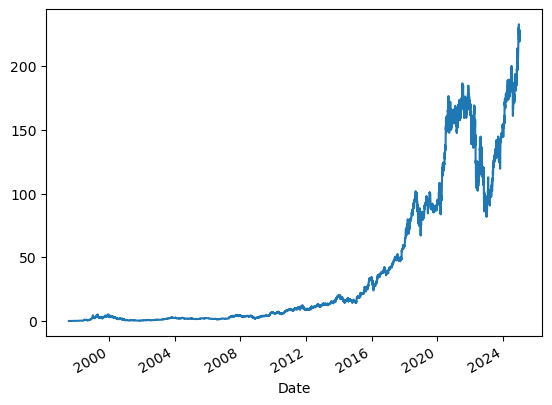

In [123]:
amzn_df['Close'].plot()

<Axes: >

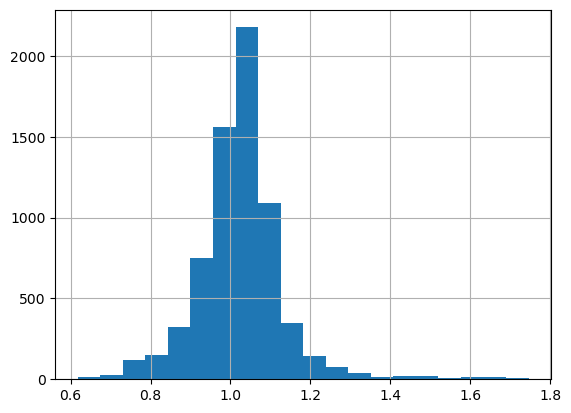

In [124]:
amzn_df['SMA Ratio'].hist(bins=20)

RSI (Relative Strength Index):
- simple momentum indicator, used to identify overbought or oversold conditions
- calculated using formula 100 - (100 / (1 + RSI)) where RSI is the mean gain divided by the mean loss over some time period
- a value above 70 is typically used to indicate that an asset is overbought and a value less tahn 30 is typically used to indicate that an asset is oversold
- calculated here using a 14 day rolling window

In [125]:
amzn_df['Diff'] = amzn_df['Close'].diff()
amzn_df.dropna(inplace=True)
amzn_df

,Close,Volume,SMA Ratio,Diff
Date,,,,
1997-07-28 00:00:00-04:00,0.116146,51480000,1.267776,0.004688
1997-07-29 00:00:00-04:00,0.123958,96288000,1.259503,0.007812
1997-07-30 00:00:00-04:00,0.122396,50352000,1.255540,-0.001562
1997-07-31 00:00:00-04:00,0.119792,29088000,1.254781,-0.002604
1997-08-01 00:00:00-04:00,0.120833,71760000,1.255434,0.001041
...,...,...,...,...
2024-12-30 00:00:00-05:00,221.300003,28321200,1.079645,-2.449997
2024-12-31 00:00:00-05:00,219.389999,24819700,1.070065,-1.910004
2025-01-02 00:00:00-05:00,220.220001,33956600,1.061704,0.830002


In [126]:
amzn_df.head(20)

,Close,Volume,SMA Ratio,Diff
Date,,,,
1997-07-28 00:00:00-04:00,0.116146,51480000,1.267776,0.004688
1997-07-29 00:00:00-04:00,0.123958,96288000,1.259503,0.007812
1997-07-30 00:00:00-04:00,0.122396,50352000,1.255540,-0.001562
1997-07-31 00:00:00-04:00,0.119792,29088000,1.254781,-0.002604
1997-08-01 00:00:00-04:00,0.120833,71760000,1.255434,0.001041
1997-08-04 00:00:00-04:00,0.115625,53424000,1.250069,-0.005208
1997-08-05 00:00:00-04:00,0.110417,60648000,1.244520,-0.005208
1997-08-06 00:00:00-04:00,0.112500,24864000,1.233541,0.002083
1997-08-07 00:00:00-04:00,0.108854,40680000,1.220793,-0.003646


In [127]:
amzn_df['Mean gain'] = amzn_df['Diff'].rolling(window=14).apply(lambda x: x[x > 0].mean())
amzn_df['Mean loss'] = amzn_df['Diff'].rolling(window=14).apply(lambda x: abs(x[x <= 0].mean()))
amzn_df.dropna(inplace=True)
amzn_df.head(20)

,Close,Volume,SMA Ratio,Diff,Mean gain,Mean loss
Date,,,,,,
1997-08-14 00:00:00-04:00,0.107813,20832000,1.138864,-0.002083,0.003863,0.003353
1997-08-15 00:00:00-04:00,0.105729,31944000,1.117130,-0.002084,0.003698,0.003212
1997-08-18 00:00:00-04:00,0.102083,35688000,1.099265,-0.003646,0.002669,0.003255
1997-08-19 00:00:00-04:00,0.108333,20064000,1.091941,0.006250,0.003385,0.003443
1997-08-20 00:00:00-04:00,0.108333,19992000,1.081505,0.000000,0.003385,0.003154
1997-08-21 00:00:00-04:00,0.105729,12480000,1.072325,-0.002604,0.003971,0.003099
1997-08-22 00:00:00-04:00,0.106250,14256000,1.058688,0.000521,0.003281,0.002865
1997-08-25 00:00:00-04:00,0.110938,22536000,1.046812,0.004688,0.003516,0.002572
1997-08-26 00:00:00-04:00,0.117188,51480000,1.046061,0.006250,0.004210,0.002572


In [128]:
amzn_df['RSI'] = 100 - (100 / (1 + (amzn_df['Mean gain'] / amzn_df['Mean loss'])))
amzn_df.drop(labels=['Diff', 'Mean gain', 'Mean loss'], axis=1, inplace=True)
amzn_df

,Close,Volume,SMA Ratio,RSI
Date,,,,
1997-08-14 00:00:00-04:00,0.107813,20832000,1.138864,53.534446
1997-08-15 00:00:00-04:00,0.105729,31944000,1.117130,53.516533
1997-08-18 00:00:00-04:00,0.102083,35688000,1.099265,45.053251
1997-08-19 00:00:00-04:00,0.108333,20064000,1.091941,49.575140
1997-08-20 00:00:00-04:00,0.108333,19992000,1.081505,51.768678
...,...,...,...,...
2024-12-30 00:00:00-05:00,221.300003,28321200,1.079645,51.628504
2024-12-31 00:00:00-05:00,219.389999,24819700,1.070065,50.749226
2025-01-02 00:00:00-05:00,220.220001,33956600,1.061704,44.291792


<Axes: >

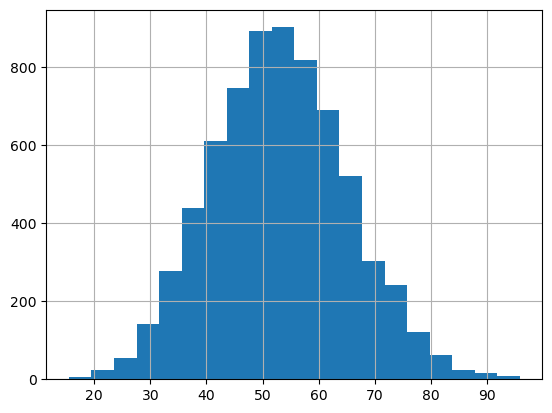

In [129]:
amzn_df['RSI'].hist(bins=20)

Bollinger Bands:
- used to measure price volatility of an asset 
- calculated with two bands, two standard deviations above and below a moving average line
- the distance between the bands indicates volatility of the asset
- also used to indicate overbought or oversold conditions - overbought when the price moves above the upper band and oversold when the price moves below the lower band
- here, just the Bollinger Bandwidth is used as a volatility indicator for simplicity and reducing the number of redundant features- a large bandwidth indicates high volatility and smaller bandwidth indicates lower volatility 
- the bandwidth is calculated as: (upper band - lower band)/ middle band for a given window (20 periods in this case)

In [130]:
amzn_df['Std dev'] = amzn_df['Close'].rolling(window=20).std()
amzn_df.dropna(inplace=True)
amzn_df

,Close,Volume,SMA Ratio,RSI,Std dev
Date,,,,,
1997-09-11 00:00:00-04:00,0.157813,85248000,1.167264,72.324230,0.019969
1997-09-12 00:00:00-04:00,0.184375,66672000,1.201997,78.457961,0.023983
1997-09-15 00:00:00-04:00,0.154688,111672000,1.221690,60.000276,0.024289
1997-09-16 00:00:00-04:00,0.167708,128640000,1.249354,61.774824,0.024946
1997-09-17 00:00:00-04:00,0.170313,52152000,1.282008,55.907083,0.025709
...,...,...,...,...,...
2024-12-30 00:00:00-05:00,221.300003,28321200,1.079645,51.628504,5.666061
2024-12-31 00:00:00-05:00,219.389999,24819700,1.070065,50.749226,4.839531
2025-01-02 00:00:00-05:00,220.220001,33956600,1.061704,44.291792,4.199177


In [131]:
amzn_df['SMA 20'] = amzn_df['Close'].rolling(window=20).mean()
amzn_df.dropna(inplace=True)
amzn_df

,Close,Volume,SMA Ratio,RSI,Std dev,SMA 20
Date,,,,,,
1997-10-08 00:00:00-04:00,0.200260,56136000,1.368536,62.081040,0.022098,0.195742
1997-10-09 00:00:00-04:00,0.187500,79008000,1.345808,53.301818,0.020343,0.197227
1997-10-10 00:00:00-04:00,0.195052,75744000,1.323756,42.939429,0.020127,0.197760
1997-10-13 00:00:00-04:00,0.200000,16296000,1.308761,42.105261,0.017387,0.200026
1997-10-14 00:00:00-04:00,0.198958,30936000,1.283152,46.601793,0.015647,0.201589
...,...,...,...,...,...,...
2024-12-30 00:00:00-05:00,221.300003,28321200,1.079645,51.628504,5.666061,224.336500
2024-12-31 00:00:00-05:00,219.389999,24819700,1.070065,50.749226,4.839531,224.770499
2025-01-02 00:00:00-05:00,220.220001,33956600,1.061704,44.291792,4.199177,225.109499


In [132]:
amzn_df['Bandwidth'] = ((amzn_df['SMA 20'] + (2 * amzn_df['Std dev'])) - (amzn_df['SMA 20'] - (2 * amzn_df['Std dev']))) / amzn_df['SMA 20']
amzn_df

,Close,Volume,SMA Ratio,RSI,Std dev,SMA 20,Bandwidth
Date,,,,,,,
1997-10-08 00:00:00-04:00,0.200260,56136000,1.368536,62.081040,0.022098,0.195742,0.451564
1997-10-09 00:00:00-04:00,0.187500,79008000,1.345808,53.301818,0.020343,0.197227,0.412582
1997-10-10 00:00:00-04:00,0.195052,75744000,1.323756,42.939429,0.020127,0.197760,0.407098
1997-10-13 00:00:00-04:00,0.200000,16296000,1.308761,42.105261,0.017387,0.200026,0.347698
1997-10-14 00:00:00-04:00,0.198958,30936000,1.283152,46.601793,0.015647,0.201589,0.310476
...,...,...,...,...,...,...,...
2024-12-30 00:00:00-05:00,221.300003,28321200,1.079645,51.628504,5.666061,224.336500,0.101028
2024-12-31 00:00:00-05:00,219.389999,24819700,1.070065,50.749226,4.839531,224.770499,0.086124
2025-01-02 00:00:00-05:00,220.220001,33956600,1.061704,44.291792,4.199177,225.109499,0.074616


<Axes: >

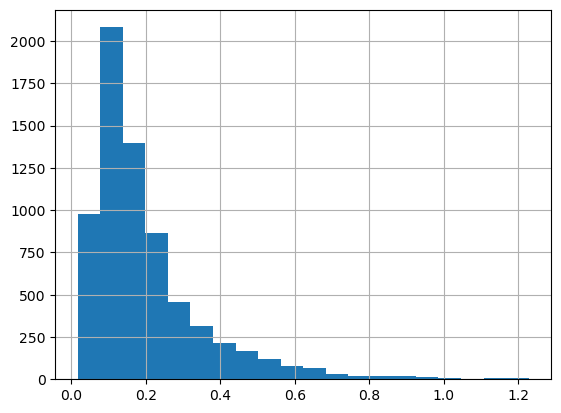

In [133]:
amzn_df['Bandwidth'].hist(bins=20)